## Overview:
This project revolves around addressing a crucial need for Easy Sailing Language Training, a prominent language education company. The primary objective is to develop a robust Natural Language Processing (NLP) model that serves as the cornerstone for an English program. The ultimate goal is to create a reliable tool capable of assessing new students' writing proficiency in English, aligning with the International English Language Testing System (IELTS) grading system. The envisioned outcome is a valuable resource that aids prospective students in understanding the necessary time investment required to progress to the next proficiency level.

In [1]:
#!pip install -r requirements.txt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the training data
training_data = pd.read_excel('data/training_set_rel3.xls')

# Load the validation data
validation_data = pd.read_excel('data/valid_set.xls')

training_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check the data structure
print("Data Structure:")
print(training_data.info())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2  

In [3]:

# Check the columns of the dataset
print("\nColumns:")
print(training_data.columns)


Columns:
Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')


In [4]:
# Check for missing or inconsistent entries
print("\nMissing or Inconsistent Entries:")
print(training_data.isnull().sum())


Missing or Inconsistent Entries:
essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64


 
 ### Essay Set Analysis


Unique Groups:
[1 2 3 4 5 6 7 8]


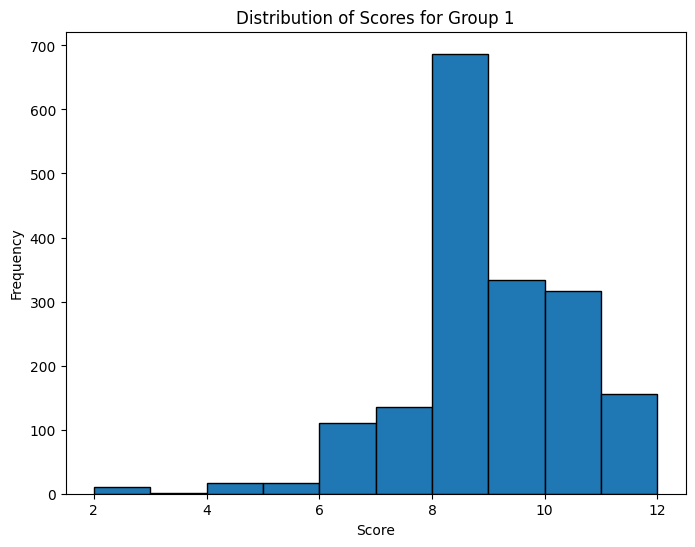


Statistics for Group 1:
Mean Score: 8.528323051037576
Median Score: 8.0
Minimum Score: 2.0
Maximum Score: 12.0
Standard Deviation: 1.5385651641273892


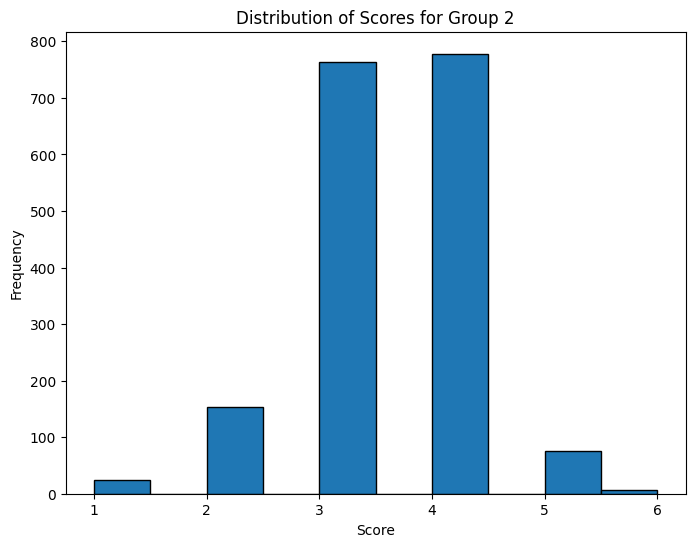


Statistics for Group 2:
Mean Score: 3.4155555555555557
Median Score: 3.0
Minimum Score: 1.0
Maximum Score: 6.0
Standard Deviation: 0.7745121451983221


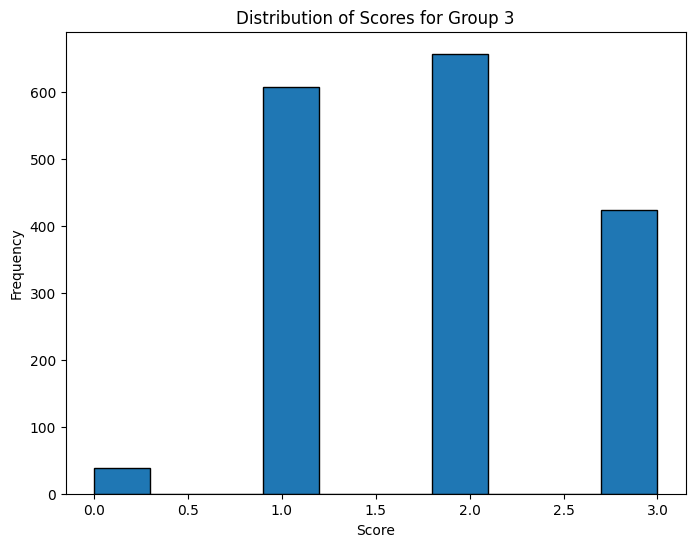


Statistics for Group 3:
Mean Score: 1.8482039397450754
Median Score: 2.0
Minimum Score: 0.0
Maximum Score: 3.0
Standard Deviation: 0.815156935975236


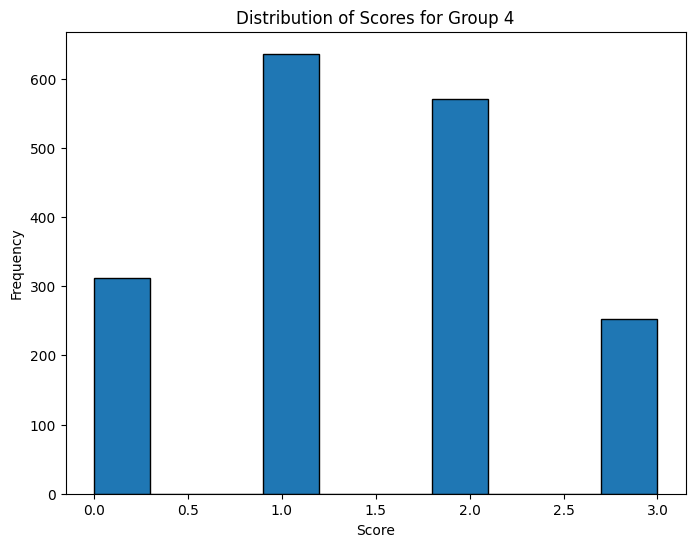


Statistics for Group 4:
Mean Score: 1.4313946922642575
Median Score: 1.0
Minimum Score: 0.0
Maximum Score: 3.0
Standard Deviation: 0.9401329558304301


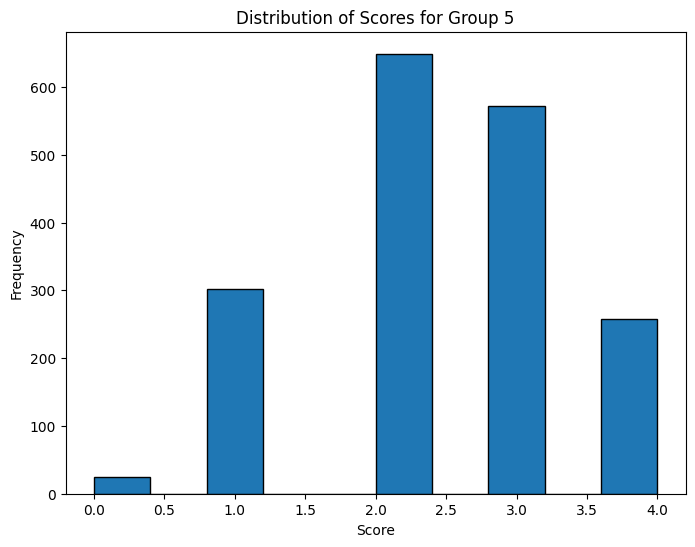


Statistics for Group 5:
Mean Score: 2.4088642659279778
Median Score: 2.0
Minimum Score: 0.0
Maximum Score: 4.0
Standard Deviation: 0.9708210150783203


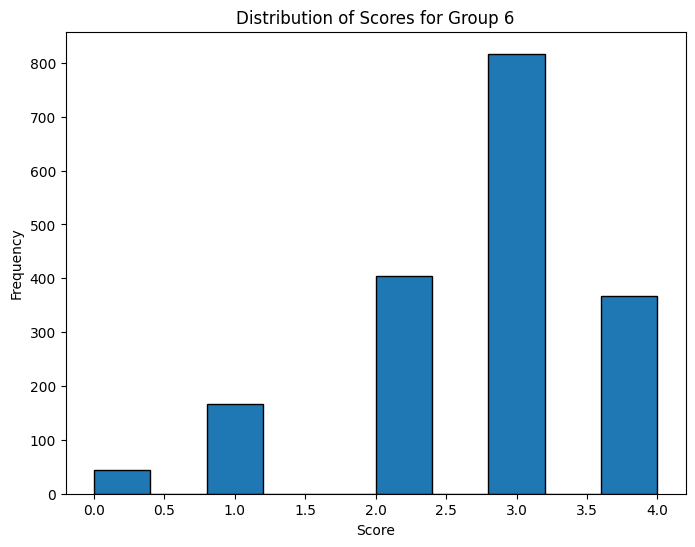


Statistics for Group 6:
Mean Score: 2.72
Median Score: 3.0
Minimum Score: 0.0
Maximum Score: 4.0
Standard Deviation: 0.9706304146738622


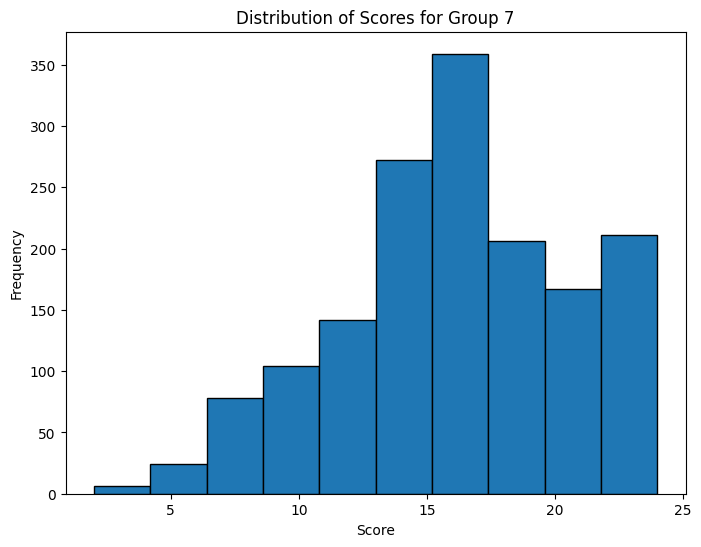


Statistics for Group 7:
Mean Score: 16.062460165710643
Median Score: 16.0
Minimum Score: 2.0
Maximum Score: 24.0
Standard Deviation: 4.585349820279463


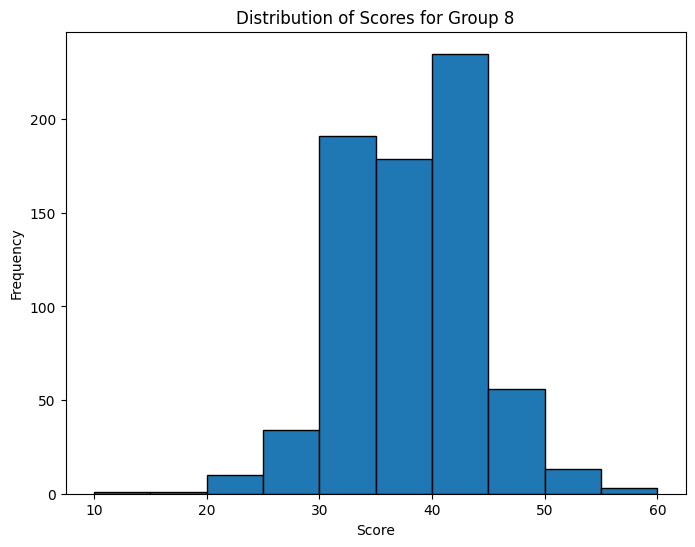


Statistics for Group 8:
Mean Score: 36.95020746887967
Median Score: 37.0
Minimum Score: 10.0
Maximum Score: 60.0
Standard Deviation: 5.753501579717453


In [5]:
# Get unique groups in the essay_set column
groups = training_data['essay_set'].unique()

# Print the unique groups
print("Unique Groups:")
print(groups)

# Analyze the distributions and statistics for each group
for group in groups:
    # Filter the data for the current group
    group_data = training_data[training_data['essay_set'] == group]
    
    # Plot the distribution of scores for the current group
    plt.figure(figsize=(8, 6))
    plt.hist(group_data['domain1_score'], bins=10, edgecolor='black')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Scores for Group {group}')
    plt.show()
    
    # Calculate and print important statistics for the current group
    print(f"\nStatistics for Group {group}:")
    print("Mean Score:", group_data['domain1_score'].mean())
    print("Median Score:", group_data['domain1_score'].median())
    print("Minimum Score:", group_data['domain1_score'].min())
    print("Maximum Score:", group_data['domain1_score'].max())
    print("Standard Deviation:", group_data['domain1_score'].std())

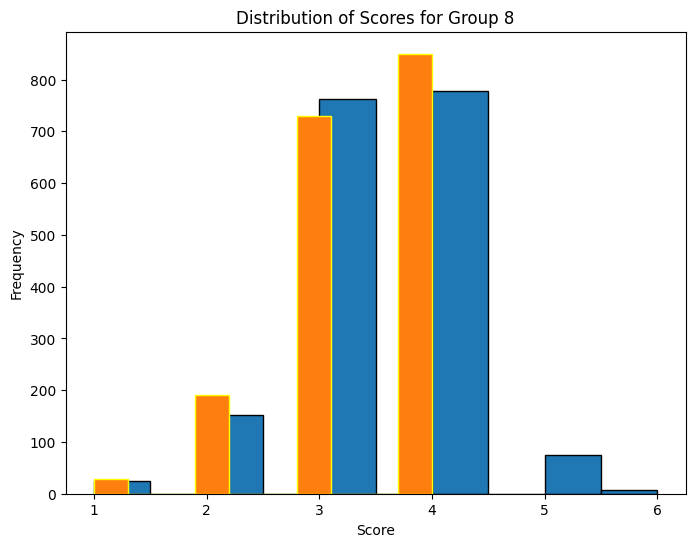


Statistics for Group 2:
Mean Score for domain 1 : 3.4155555555555557
Median Score for domain 1: 3.0
Minimum Score for domain 1: 1.0
Maximum Score for domain 1: 6.0
Standard Deviation for domain 1 : 0.7745121451983221
Mean Score for domain 2 : 3.3338888888888887
Median Score for domain 2: 3.0
Minimum Score for domain 2: 1.0
Maximum Score for domain 2: 4.0
Standard Deviation for domain 2 : 0.7291030902165395


In [10]:
group_2 = training_data[training_data['essay_set'] == 2]
# Plot the distribution of scores for the current group
plt.figure(figsize=(8, 6))
plt.hist(group_2['domain1_score'], bins=10, edgecolor='black')
plt.hist(group_2['domain2_score'], bins=10, edgecolor='yellow')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Distribution of Scores for Group {group}')
plt.show()

# Calculate and print important statistics for the current group
print("\nStatistics for Group 2:")
print("Mean Score for domain 1 :", group_2['domain1_score'].mean())
print("Median Score for domain 1:", group_2['domain1_score'].median())
print("Minimum Score for domain 1:", group_2['domain1_score'].min())
print("Maximum Score for domain 1:", group_2['domain1_score'].max())
print("Standard Deviation for domain 1 :", group_2['domain1_score'].std())

print("Mean Score for domain 2 :", group_2['domain2_score'].mean())
print("Median Score for domain 2:", group_2['domain2_score'].median())
print("Minimum Score for domain 2:", group_2['domain2_score'].min())
print("Maximum Score for domain 2:", group_2['domain2_score'].max())
print("Standard Deviation for domain 2 :", group_2['domain2_score'].std())


### Remark:

There are eight essay sets. Each of the sets of essays was generated from a single prompt. The prompts vary widely.

### Analysis on the Ratings 

rater1_domain1, rater2_domain1, rater3_domain1: These columns represent the scores given by different raters (rater1, rater2, rater3) for a specific domain (domain1). This domain could refer to a particular aspect of the essay, such as content quality, argument strength, etc.

In [6]:
# Replace NaN values with 0 before summing
training_data['calculated_sum'] = training_data[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']].fillna(0).sum(axis=1)

# Compare the calculated sum with the actual domain1_score
training_data['sum_matches'] = training_data['calculated_sum'] == training_data['domain1_score']

# Use value_counts() to display the number of rows that match and don't match
print(training_data['sum_matches'].value_counts())

False    8529
True     4449
Name: sum_matches, dtype: int64


### Analysis of Results:

- **Matching Scores**: In some rows, the sum of the rater scores matches the `domain1_score`, which means that, for these cases, `domain1_score` can be considered as the summation of the individual rater scores.

- **Presence of NaN Values**: There are rows where rater score are missing (NaN). It's important to note that the calculation of the sum correctly handles these NaN values by inputting the NaN value to be 0. 

- **Discrepancies**: There are 8529 rows where `sum_matches` are `False` which suggests that there might be other factors or rules that contribute to the determination of `domain1_score` in certain cases. 


## Correlation 

In [9]:
display(training_data.corr())

/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_27356/1595407901.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(training_data.corr())


,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,calculated_sum,sum_matches
essay_id,1.000000,0.996694,0.470914,0.470062,0.062734,0.469718,0.005803,-0.008534,0.005803,0.696989,...,-0.001535,-0.020917,0.015969,-0.038396,-0.015715,-0.039681,0.103465,0.101558,0.447162,0.080466
essay_set,0.996694,1.000000,0.482252,0.481488,NaN,0.481103,NaN,NaN,NaN,0.737716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.458756,0.083392
rater1_domain1,0.470914,0.482252,1.000000,0.969328,0.732522,0.981789,0.696186,0.652462,0.696186,0.921229,...,0.565650,0.570751,0.743748,0.702981,0.682869,0.682903,0.695719,0.516019,0.931267,0.492228
rater2_domain1,0.470062,0.481488,0.969328,1.000000,0.653190,0.981166,0.637350,0.697151,0.637350,0.844190,...,0.895797,0.922200,0.535074,0.571704,0.476958,0.466155,0.599824,0.566449,0.934231,0.489008
rater3_domain1,0.062734,NaN,0.732522,0.653190,1.000000,1.000000,NaN,NaN,NaN,0.650591,...,0.574663,0.591355,0.832828,0.871336,0.742654,0.742330,0.877080,0.880368,0.966295,NaN
domain1_score,0.469718,0.481103,0.981789,0.981166,1.000000,1.000000,0.696186,0.652462,0.696186,0.898645,...,0.785316,0.813670,0.832828,0.871336,0.742654,0.742330,0.877080,0.880368,0.930723,0.581505
rater1_domain2,0.005803,NaN,0.696186,0.637350,NaN,0.696186,1.000000,0.801761,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700009,NaN
rater2_domain2,-0.008534,NaN,0.652462,0.697151,NaN,0.652462,0.801761,1.000000,0.801761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708494,NaN
domain2_score,0.005803,NaN,0.696186,0.637350,NaN,0.696186,1.000000,0.801761,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700009,NaN
rater1_trait1,0.696989,0.737716,0.921229,0.844190,0.650591,0.898645,NaN,NaN,NaN,1.000000,...,0.512357,0.479910,0.768042,0.675289,0.657641,0.629524,0.608913,0.378387,0.756894,-0.266860


#### **1.Strong Alignment in Rater Scores**:

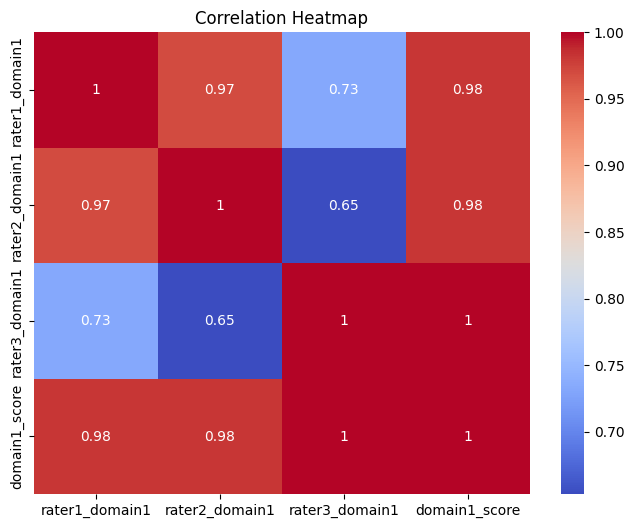

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_1 = training_data[['rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'domain1_score']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

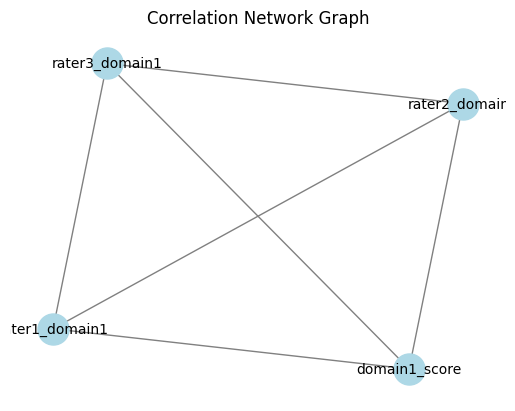

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(correlation_1.columns)

# Add edges to the graph
for i in range(len(correlation_1.columns)):
    for j in range(i+1, len(correlation_1.columns)):
        if abs(correlation_1.iloc[i, j]) > 0.5:  # Set a threshold for correlation strength
            G.add_edge(correlation_1.columns[i], correlation_1.columns[j])

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set plot title and display the graph
plt.title('Correlation Network Graph')
plt.axis('off')
plt.show()


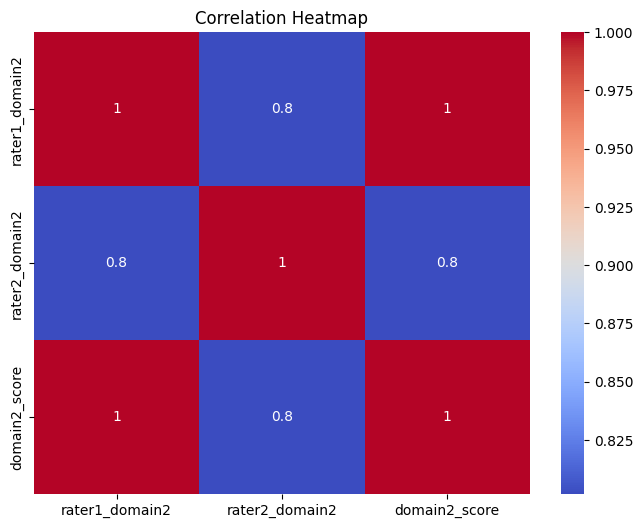

In [12]:
correlation_2 = training_data[['rater1_domain2', 'rater2_domain2', 'domain2_score']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
validation_data.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_predictionid',
       'domain2_predictionid'],
      dtype='object')


   - `rater1_domain1`, `rater2_domain1`, and `domain1_score` show high correlations with each other, indicating a strong alignment or consistency  in the way raters are scoring, or these scores contribute similarly to the overall domain1 score. High correlations here suggest consistency or agreement between raters.

   - The correlation coefficient between `rater1_domain2` and `rater2_domain2` of 0.801761 suggests a strong positive relationship between `rater1_domain2` and `rater2_domain2`. This indicates a high level of agreement or consistency in their ratings.

   - rater1_domain2 shows a perfect correlation coefficient of 1.000000 with domain2_score. This implies that the score assigned by rater1_domain2 is exactly the same as the domain2_score, suggesting that domain2_score might be directly derived from or equal to the rater1_domain2 score.

## **Conclusion**

considering the fact the rater domain scores exhibit high correlation, it means they are providing similar assesments of the essays, therefore including highly correlated fatures in a model may not necessarily provide additional information and could potentially lead to multicollinearity issues. During the feature engineering step we will drop `rater1_domain1`, `rater2_domain1`,`rater3_domain1`,
 `rater1_domain2` and `rater2_domain2`.  You can tell domain1_score and domain2_scores are the target variables by looking at the columns of `valid_sample_submission_5_column.csv`

#### **3. Significant Correlations Among Traits and Rater Scores**:

The columns related to trait scores provide a more granular(a high level of detail) assessment of specific characteristics or aspects of the essays written by students. Columns related to trait scores (specific characteristics of the essay) rater1_trait1 to rater3_trait6 represent the scores assigned by three different raters for six distinct traits associated with the essay. Having multiple raters helps mitigate individual biases and ensures a more comprehensive evaluation of the essay. Each trait score is assigned by each rater independently, reflecting their evaluation of specific elements within the essay.  

Let's analyze the trait scores so we can have valuable insights into the specific strengths and weaknesses of a student's writing. For example, if a student consistently receives low scores in Trait 3, it indicates an area that may require improvement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rater1_trait1  2292 non-null   float64
 1   rater2_trait1  2292 non-null   float64
 2   rater3_trait1  128 non-null    float64
 3   rater1_trait2  2292 non-null   float64
 4   rater2_trait2  2292 non-null   float64
 5   rater3_trait2  128 non-null    float64
 6   rater1_trait3  2292 non-null   float64
 7   rater2_trait3  2292 non-null   float64
 8   rater3_trait3  128 non-null    float64
 9   rater1_trait4  2292 non-null   float64
 10  rater2_trait4  2292 non-null   float64
 11  rater3_trait4  128 non-null    float64
 12  rater1_trait5  723 non-null    float64
 13  rater2_trait5  723 non-null    float64
 14  rater3_trait5  128 non-null    float64
 15  rater1_trait6  723 non-null    float64
 16  rater2_trait6  723 non-null    float64
 17  rater3_trait6  128 non-null    float64
 18  domain

,rater1_trait1,rater2_trait1,rater3_trait1,rater1_trait2,rater2_trait2,rater3_trait2,rater1_trait3,rater2_trait3,rater3_trait3,rater1_trait4,rater2_trait4,rater3_trait4,rater1_trait5,rater2_trait5,rater3_trait5,rater1_trait6,rater2_trait6,rater3_trait6,domain1_score,domain2_score
rater1_trait1,1.000000,0.844222,0.768042,0.899426,0.807872,0.675289,0.849100,0.794764,0.657641,0.797072,0.750522,0.629524,0.722906,0.512357,0.608913,0.677431,0.479910,0.378387,0.898645,NaN
rater2_trait1,0.844222,1.000000,0.572452,0.803123,0.909812,0.528403,0.788435,0.861489,0.537204,0.744644,0.802010,0.457737,0.487942,0.727368,0.474570,0.493761,0.687823,0.364621,0.900513,NaN
rater3_trait1,0.768042,0.572452,1.000000,0.676415,0.480959,0.838985,0.632024,0.568722,0.855713,0.676836,0.465923,0.718720,0.629113,0.522907,0.678941,0.613679,0.379099,0.533590,0.832828,NaN
rater1_trait2,0.899426,0.803123,0.676415,1.000000,0.806579,0.693937,0.866392,0.806335,0.620992,0.834271,0.771459,0.616733,0.754120,0.506302,0.644193,0.699015,0.493813,0.444306,0.905138,NaN
rater2_trait2,0.807872,0.909812,0.480959,0.806579,1.000000,0.563929,0.803612,0.885846,0.444208,0.769051,0.845270,0.450111,0.493278,0.758715,0.523074,0.492615,0.698194,0.423434,0.910881,NaN
rater3_trait2,0.675289,0.528403,0.838985,0.693937,0.563929,1.000000,0.538837,0.510996,0.764323,0.619271,0.493472,0.757024,0.601261,0.541412,0.737430,0.574435,0.430690,0.592860,0.871336,NaN
rater1_trait3,0.849100,0.788435,0.632024,0.866392,0.803612,0.538837,1.000000,0.844411,0.591967,0.877448,0.812063,0.537016,0.704242,0.457719,0.483906,0.637743,0.435633,0.337334,0.923754,NaN
rater2_trait3,0.794764,0.861489,0.568722,0.806335,0.885846,0.510996,0.844411,1.000000,0.588161,0.807883,0.886614,0.518080,0.470367,0.704811,0.455445,0.479445,0.634661,0.413650,0.928644,NaN
rater3_trait3,0.657641,0.537204,0.855713,0.620992,0.444208,0.764323,0.591967,0.588161,1.000000,0.639156,0.446768,0.796046,0.599795,0.454243,0.623502,0.577040,0.321999,0.478504,0.742654,NaN
rater1_trait4,0.797072,0.744644,0.676836,0.834271,0.769051,0.619271,0.877448,0.807883,0.639156,1.000000,0.809487,0.705108,0.790440,0.487960,0.553644,0.676088,0.471381,0.431198,0.888446,NaN


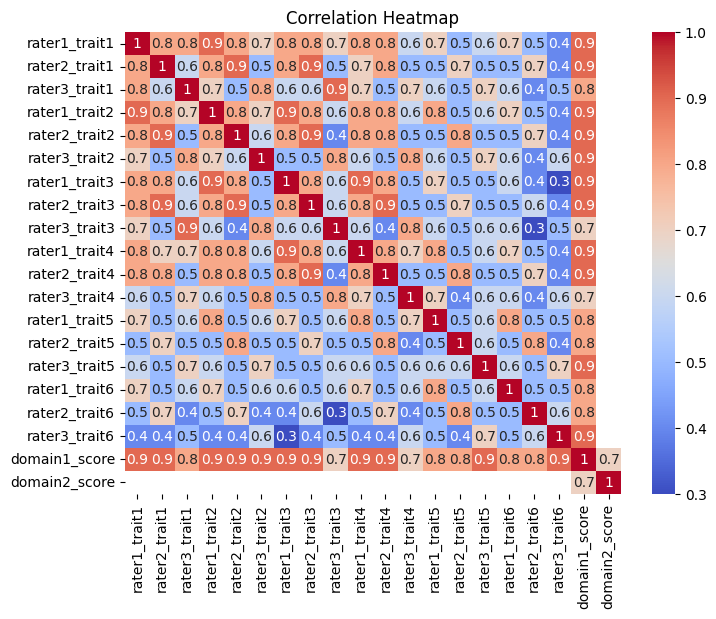

In [16]:
trait_1 =training_data[['rater1_trait1', 'rater2_trait1','rater3_trait1','rater1_trait2', 'rater2_trait2','rater3_trait2',
'rater1_trait3', 'rater2_trait3','rater3_trait3',
'rater1_trait4', 'rater2_trait4','rater3_trait4',
'rater1_trait5', 'rater2_trait5','rater3_trait5',
'rater1_trait6', 'rater2_trait6','rater3_trait6',
'domain1_score','domain2_score']]
print(trait_1.info())
print(trait_1.describe())

correlation_3 = trait_1.corr()
display(correlation_3)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_3.round(1), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


- **Interpretation**:
  - These correlations suggest that there is a pattern in how `rater1` evaluates different aspects of the essays. Traits that are more correlated might represent similar dimensions of evaluation, while lower correlations could indicate more distinct aspects of rating.


#### Handling the missing values 

- **Domain Scores:** Since we have domain1_score  12977, I am proposing we used the PCA to select the best columns of the rater domain 1 and 2 scores replace the null values in the domain 1 and 2 scores. We can use the average of the rater1_domain1, rater2_domain1 and rater3_domain1 to determine the domain1_scores. Similarly to domain2_scores

Although the validation columns dont have the rater1_domain1, rater2_domain1, rater3_domain1,rater1_domain2, rater2_domain2 and rater3_domain2. This approach can work if we have a different pipeline for training and validation sample. 

- **Rater traits** Considering the columns that we have validation sample dataset, we cannot find the columns corresonding to the 6 traits, therefore I proposed we drop the traits columns.


# Analysis on the Essay

In [18]:
from src.preprocess import initialize_nltk_resources, text_preprocessing_pipeline, analyze_essay_text

#initialize_nltk_resources()

# Analyze the training data
feature_data = training_data['essay'].apply(analyze_essay_text)
features_df = pd.DataFrame(feature_data.tolist())
features_df.head()

,Number of characters,Number of words,Number of capital characters,Number of capital words,Number of sentences,Number of unique words,Number of stopwords,Number of punctuation,Average word length,Average sentence length,Unique words vs word count feature,Stopwords count vs words count feature
0,1875,386,55,8,16,181,176,55,3.984456,116.250000,0.468912,0.455959
1,2288,464,74,17,20,209,195,46,4.030172,113.450000,0.450431,0.420259
2,1541,313,55,11,14,161,143,34,4.035144,109.142857,0.514377,0.456869
3,3165,611,262,44,27,267,223,91,4.328969,116.259259,0.436989,0.364975
4,2569,517,54,5,30,211,241,55,4.071567,84.666667,0.408124,0.466151


In [19]:
# Display one of the full essays
essay_index = 1  # Change this index to display a different essay
essay = training_data.iloc[essay_index]['essay']
print(essay)

features_df.iloc[essay_index]

Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer will help us in life by talking or making friends on line. Many people have myspace, facebooks, aim, these all benefit us by having conversations with one another. Many people believe computers are bad but how can you make friends if you can never talk to them? I am very fortunate for having a computer that can help with not only school work but my social life and how I make friends. Computers help us with finding our locations, coordibates and millions of information online. If we didn't go on the in

Number of characters                      2288.000000
Number of words                            464.000000
Number of capital characters                74.000000
Number of capital words                     17.000000
Number of sentences                         20.000000
Number of unique words                     209.000000
Number of stopwords                        195.000000
Number of punctuation                       46.000000
Average word length                          4.030172
Average sentence length                    113.450000
Unique words vs word count feature           0.450431
Stopwords count vs words count feature       0.420259
Name: 1, dtype: float64

In [20]:
from src.preprocess import count_text_punctuation, extract_tagged_entities

# Counts the occurrences of each punctuation mark in the essay
count_text_punctuation(essay)

{'@': 10, ',': 12, '.': 18, '?': 1, "'": 3, '-': 1, '!': 1}

In [21]:

# Extracts the tagged entities from the essay
tagged_entities = extract_tagged_entities(essay)
print(tagged_entities)

['CAPS1', 'CAPS2', 'NUM1', 'MONTH1', 'LOCATION1', 'LOCATION3', 'LOCATION2', 'NUM1', 'NUM3', 'NUM3']


#### Pre-processing 

For the given essay, below is the preprocessing pipeline used:

1. **Remove Special Tokens**  
   The essay contains tokens like `@CAPS1`, `@NUM1`, `@MONTH1`, `@LOCATION1`, etc., which are placeholders for proper nouns, numbers, months, and locations. We removed this special token.

2. **Lowercasing**  
  We convert all text to lowercase to maintain consistency.

3. **Punctuation and Special Characters**  
 Since we are dealing with  essay rating.We are going to keep the punctuation, It contributes to a comprehensive evaluation of the writer's abilities and the overall quality of the essay. 

4. **Tokenization**  
   We split the text into individual words or tokens.

5. **Remove Stop Words**  
   We remove the stop words (common words like 'the', 'is', 'at')  as they occur frequently and typically don't carry significant meaning.

6. **Stemming or Lemmatization**  
   Reduce words to their root form. Lemmatization considers the context and converts the word to its meaningful base form, whereas stemming simply removes suffixes.

7. **Handling Numbers**  
   Decide how to handle numbers – remove them, replace them with placeholders, or keep them based on their relevance.

8. **Whitespace Removal**  
   Eliminate extra whitespaces, line breaks, and tabs for consistency.


In [22]:
from src.preprocess import initialize_nltk_resources, text_preprocessing_pipeline

# Apply the preprocessing pipeline to the training data and drop the original essay column
training_data['essay'] = training_data['essay'].apply(text_preprocessing_pipeline)

# Apply the preprocessing pipeline to the validation data and drop the original essay column
validation_data['essay'] = validation_data['essay'].apply(text_preprocessing_pipeline)

# Display the first 5 rows of the clean_essay column for the training data
print(training_data['essay'].head())

0    dear local newspaper , think effect computer p...
1    dear , believe using computer benefit u many w...
2    dear , people use computer , everyone agrees b...
3    dear local newspaper , found many expert say c...
4    dear , know computer positive effect people . ...
Name: essay, dtype: object


In [48]:
# Analyze the training data after preprocessing
feature_data = training_data['essay'].apply(analyze_essay_text)
features_df = pd.DataFrame(feature_data.tolist())
display(features_df.head())

,Number of characters,Number of words,Number of capital characters,Number of capital words,Number of sentences,Number of unique words,Number of stopwords,Number of punctuation,Average word length,Average sentence length,Unique words vs word count feature,Stopwords count vs words count feature
0,1135,200,0,0,16,112,0,50,4.680000,70.000000,0.560000,0.0
1,1458,249,0,0,20,128,0,36,4.859438,71.950000,0.514056,0.0
2,943,156,0,0,14,88,0,27,5.051282,66.428571,0.564103,0.0
3,1931,306,0,0,27,170,0,53,5.313725,70.555556,0.555556,0.0
4,1588,268,0,0,30,124,0,51,4.929104,51.966667,0.462687,0.0


In [89]:
#!pip install gensim
from gensim.models import Word2Vec

# Define and train the Word2Vec model
model = Word2Vec(training_data['essay'], vector_size=100, window=5, min_count=1, workers=4)

In [90]:
# Function to get the average vector for an essay
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not vectors:
        return [0] * vector_size  # Return a vector of zeros if no valid tokens
    average_vector = sum(vectors) / len(vectors)
    return average_vector

# Apply the function to get the average vector for each essay
training_data['essay_vector'] = training_data['essay'].apply(lambda tokens: get_average_vector(tokens, model, 100))

In [93]:
# Display the DataFrame with essay vectors
training_data[['essay', 'essay_vector']]

,essay,essay_vector
0,"Dear local newspaper, I think effects computer...","[-0.11645528, -0.3468976, 0.101124465, -0.0983..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[-0.11282217, -0.33479017, 0.10000894, -0.0774..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[-0.13593891, -0.3224142, 0.1101117, -0.079114..."
3,"Dear Local Newspaper, @CAPS1 I have found that...","[-0.13400576, -0.20638339, -0.04488744, -0.051..."
4,"Dear @LOCATION1, I know having computers has a...","[-0.11560105, -0.3316525, 0.13857058, -0.06853..."
...,...,...
12973,In most stories mothers and daughters are eit...,"[-0.14687042, -0.24834925, -0.045947235, -0.09..."
12974,I never understood the meaning laughter is th...,"[-0.1684078, -0.23751459, 0.0011622388, -0.098..."
12975,"When you laugh, is @CAPS5 out of habit, or is ...","[-0.16672438, -0.21693487, -0.028245911, -0.09..."
12976,Trippin' on fen...,"[-0.078541726, -0.25360262, 0.028918386, -0.01..."


## Feature Selection

We are going to have two pipelines, one for the training data and the other for the validation data.

Training pipeline transformation: 
 - drop the rater traits 
 - Input the Null domain scores with the either of t following option selected 
     -  The average of the rater domain scores or 
     -  PCA to determine the best column of the 3 raters and use it to fill the null domain scores
 - Preprocess the essay 
 

Validation Pipeline transformation:
 - Preprocess the essay 




In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the training data
training_data = pd.read_excel('data/training_set_rel3.xls')

# Load the validation data
validation_data = pd.read_excel('data/valid_set.xls')

training_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from src.preprocess import get_average_vector

# Apply the function to get the average vector for each essay
training_data['essay_vector'] = training_data['essay'].apply(lambda text: get_average_vector(text, 100))

In [5]:

# Display the DataFrame with essay vectors and essay
training_data[['essay', 'essay_vector']]

,essay,essay_vector
0,"Dear local newspaper, I think effects computer...","[-0.0018533318, 0.0018306837, 0.0014450253, 0...."
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[-0.0016639465, 0.0019178969, 0.0011549717, 0...."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[-0.0019543157, 0.0019077965, 0.0012039462, 0...."
3,"Dear Local Newspaper, @CAPS1 I have found that...","[-0.0017123289, 0.0019363962, 0.0012750842, 0...."
4,"Dear @LOCATION1, I know having computers has a...","[-0.0016557423, 0.0017311055, 0.0010426836, 0...."
...,...,...
12973,In most stories mothers and daughters are eit...,"[-0.0015955308, 0.0018323777, 0.0013873195, 0...."
12974,I never understood the meaning laughter is th...,"[-0.0014259345, 0.001778489, 0.0012796904, 0.0..."
12975,"When you laugh, is @CAPS5 out of habit, or is ...","[-0.0017121065, 0.0017537073, 0.001394616, 0.0..."
12976,Trippin' on fen...,"[-0.0016448414, 0.0017089194, 0.0013829508, 0...."


### Preprocessing Pipeline

In [24]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from gensim.models import Word2Vec
from gensim.downloader import load as gensim_load
import numpy as np

# Preprocessing function for essays
def preprocess_essay(essays):
    # Placeholder for the actual preprocessing logic
    return [text_preprocessing_pipeline(essay) for essay in essays]

# Function to drop rater traits
def drop_rater_traits(df):
    columns_to_drop = [col for col in df.columns if 'trait' in col]
    return df.drop(columns=columns_to_drop)

# Function to impute null domain scores
def impute_domain_scores(df, strategy='mean'):
    if strategy == 'mean':
        # Compute the mean of the rater domain scores
        df['domain1_score'] = df['domain1_score'].fillna(df[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']].mean(axis=1))
        df['domain2_score'] = df['domain2_score'].fillna(df[['rater1_domain2', 'rater2_domain2']].mean(axis=1))
        # drop the rater domain score columns
        df = df.drop(columns=['rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2'])
    elif strategy == 'pca':
        # Apply PCA and use the first principal component to impute missing values
        pca = PCA(n_components=1)
        domain1_scores = pca.fit_transform(df[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']].dropna())
        df['domain1_score'] = df['domain1_score'].fillna(np.squeeze(domain1_scores))
        
        domain2_scores = pca.fit_transform(df[['rater1_domain2', 'rater2_domain2']].dropna())
        df['domain2_score'] = df['domain2_score'].fillna(np.squeeze(domain2_scores))
        
        # drop the rater domain score columns
        df = df.drop(columns=['rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2'])
    return df

# Main training pipeline
def training_pipeline(df, get_average_vector, domain_score_imputer_strategy='mean'):
    # Drop rater trait columns
    df = drop_rater_traits(df)
    
    # Impute domain scores
    df = impute_domain_scores(df, strategy=domain_score_imputer_strategy)
    
    # Preprocess essays using the get_average_vector function
    df['essay'] = df['essay'].apply(lambda text: get_average_vector(text, 100))
    
    return df

# Validation pipeline, which could just reuse the essay preprocessing part
def validation_pipeline(df, essay_preprocessor):
    df['essay'] = essay_preprocessor(df['essay'])
    return df


In [25]:
# Apply the training pipeline to the training data
preprocessing_df = training_pipeline(training_data,get_average_vector, domain_score_imputer_strategy='mean')


In [26]:
# Display the first 5 rows of the DataFrame
preprocessing_df.head()

,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"[-0.0018533318, 0.0018306837, 0.0014450253, 0....",8.0,NaN
1,2,1,"[-0.0016639465, 0.0019178969, 0.0011549717, 0....",9.0,NaN
2,3,1,"[-0.0019543157, 0.0019077965, 0.0012039462, 0....",7.0,NaN
3,4,1,"[-0.0017123289, 0.0019363962, 0.0012750842, 0....",10.0,NaN
4,5,1,"[-0.0016557423, 0.0017311055, 0.0010426836, 0....",8.0,NaN


In [27]:
preprocessing_df.corr()

/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_62165/1452103566.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocessing_df.corr()


,essay_id,essay_set,domain1_score,domain2_score
essay_id,1.000000,0.996694,0.469718,0.005803
essay_set,0.996694,1.000000,0.481103,NaN
domain1_score,0.469718,0.481103,1.000000,0.696186
domain2_score,0.005803,NaN,0.696186,1.000000
